In [1]:
import networkx as nx
import pandas as pd
nodes_df = pd.read_csv('network.csv/nodes.csv', low_memory=False)


df = pd.read_csv('network.csv/edges.csv', low_memory=False)

G = nx.from_pandas_edgelist(df, source='source', target='target', edge_attr=True)

for note, attr in nodes_df.iterrows():
    node_id = attr['index']
    G.nodes[node_id].update(attr.to_dict())

gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(gcc[0])

degree_assortativity = nx.degree_assortativity_coefficient(G0)
print(f"Degree Assortativity: {degree_assortativity}")

#getting the attributes of one node:
#print(G0.nodes[0])

#get list of all unique attributes:
#using a  set cuase it only stores unique values
node_attributes = set()
for node,atrr in G0.nodes(data= True):
    node_attributes.update(atrr.keys())

#do the same for edges:
edge_attributes = set()
for node1,node2,atrr in G0.edges(data= True):
    edge_attributes.update(atrr.keys())

attrs = list(node_attributes)
assort_coeff = {}

for attr in attrs:
    coeff_ = nx.attribute_assortativity_coefficient(G0, attr)
    assort_coeff[attr] = coeff_
print(dict(sorted(assort_coeff.items(), key=lambda item: item[1], reverse=True)))


Degree Assortativity: -0.23351931979140378
{'GONO': 0.3999446631491156, 'CHLAM': 0.3999446631491156, 'FRSTYR': 0.2798463371534444, 'HIV': 0.015846504092904678, 'SEX': 0.012634828166772864, 'YOB': 0.004743113310426745, 'GONOEV': 0.0037639472252941728, 'CHLAMEV': 0.003763947225284618, 'AGE': 0.0029139695869570045, 'index': -0.00021994672718248214, 'name': -0.0002199467271824845, '_pos': -0.00021994672718254833, 'CHLAMHX': -0.0034961740816744336, 'GONOHX': -0.0036504589189887277, 'LINENUM': -0.007259584590474202, 'SYPHHX': -0.009350492268593635, 'HIVHX': -0.03859578787254653, 'OCCPRES': -0.04071876144480212, 'OCCCENS': -0.042536696167574335, 'RETIRED': -0.06341638351697322, 'DRUGMAN': -0.0635778168744987, 'JOHN': -0.06367388143650021, 'HWIFE': -0.0640376874169147, 'PIMP': -0.06455882652478252, 'BACKFIL': -0.07029961428070548, 'HBV': -0.07463215043113042, 'SYPHEV': -0.07807358867613884, 'PRO': -0.07908005458204262, 'DEALER': -0.0820016028648812, 'THIEF': -0.08508399382106163, 'SG': -0.0870

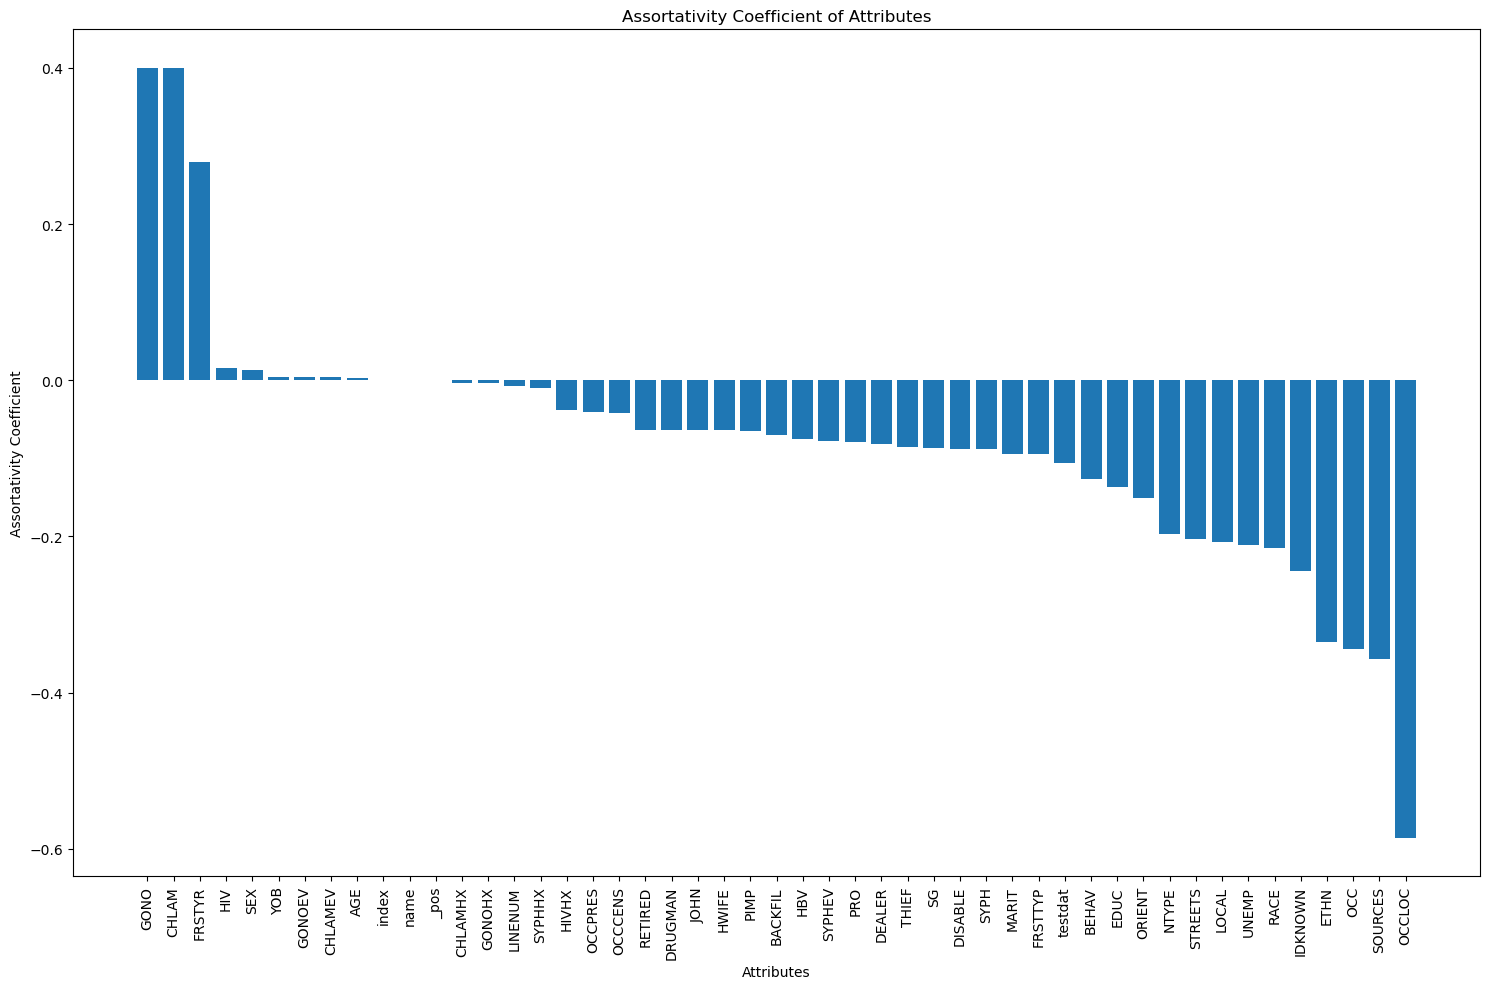

In [15]:
import matplotlib.pyplot as plt
assorattridict = {'GONO': 0.3999446631491156, 'CHLAM': 0.3999446631491156, 'FRSTYR': 0.2798463371534444, 'HIV': 0.015846504092904678, 'SEX': 0.012634828166772864, 'YOB': 0.004743113310426745, 'GONOEV': 0.003763947225291004, 'CHLAMEV': 0.003763947225281437, 'AGE': 0.0029139695869570045, 'index': -0.00021994672718248214, 'name': -0.0002199467271824845, '_pos': -0.00021994672718255056, 'CHLAMHX': -0.0034961740816744336, 'GONOHX': -0.0036504589189887277, 'LINENUM': -0.007259584590474202, 'SYPHHX': -0.009350492268593635, 'HIVHX': -0.03859578787254653, 'OCCPRES': -0.04071876144480212, 'OCCCENS': -0.04253669616757435, 'RETIRED': -0.06341638351697322, 'DRUGMAN': -0.0635778168744987, 'JOHN': -0.06367388143650021, 'HWIFE': -0.0640376874169147, 'PIMP': -0.06455882652478252, 'BACKFIL': -0.07029961428070548, 'HBV': -0.07463215043113042, 'SYPHEV': -0.0780735886761391, 'PRO': -0.07908005458204262, 'DEALER': -0.0820016028648812, 'THIEF': -0.08508399382106163, 'SG': -0.0870515780763997, 'DISABLE': -0.08753801726354796, 'SYPH': -0.08834241940508816, 'MARIT': -0.09411719685604415, 'FRSTTYP': -0.09465325841970039, 'testdat': -0.10581050390786623, 'BEHAV': -0.1268801560412837, 'EDUC': -0.13612393538547343, 'ORIENT': -0.15044481257159864, 'NTYPE': -0.19732668138183415, 'STREETS': -0.20288177388158476, 'LOCAL': -0.20712879121786698, 'UNEMP': -0.21082354529975314, 'RACE': -0.21515542229886236, 'IDKNOWN': -0.24428127074348094, 'ETHN': -0.33552173048340633, 'OCC': -0.3434829270089344, 'SOURCES': -0.35672443940855847, 'OCCLOC': -0.5858499278611714}
assorattridict = dict(sorted(assorattridict.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(15,10))
plt.bar(range(len(assorattridict)), list(assorattridict.values()), align='center')
plt.xticks(range(len(assorattridict)), list(assorattridict.keys()), rotation=90)
plt.title('Assortativity Coefficient of Attributes')
plt.xlabel('Attributes')
plt.ylabel('Assortativity Coefficient')
plt.tight_layout()
plt.savefig('assortativity.png')
plt.show()
